BASIC EDA

In [18]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/all_reads.tsv", sep="\t")
print(df.shape)
df["label"].value_counts(normalize=True)

(39983, 30)


label
1    0.500213
0    0.499787
Name: proportion, dtype: float64

Histograms / KDE for key features

/var/folders/sj/r5b1vnb91cjffx5_zt6rs8v80000gn/T/ipykernel_73532/2567605371.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=feat, hue="label", common_norm=False)


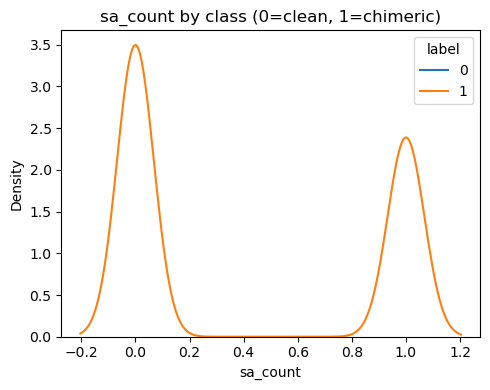

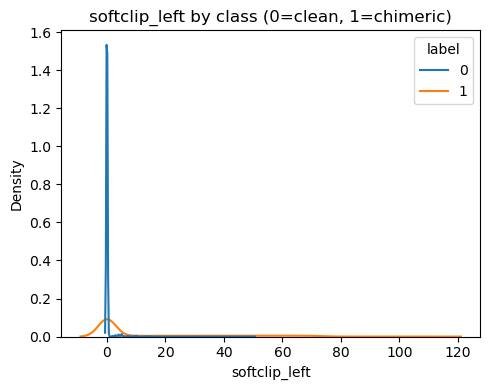

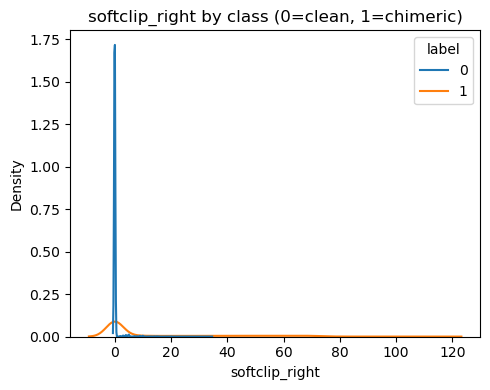

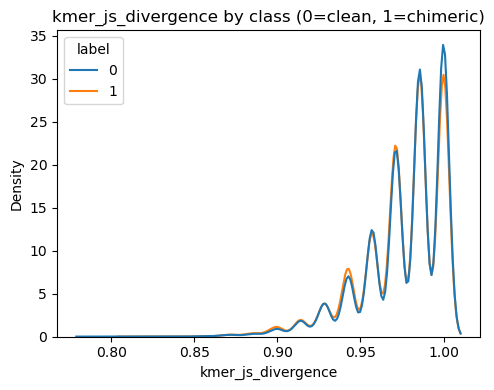

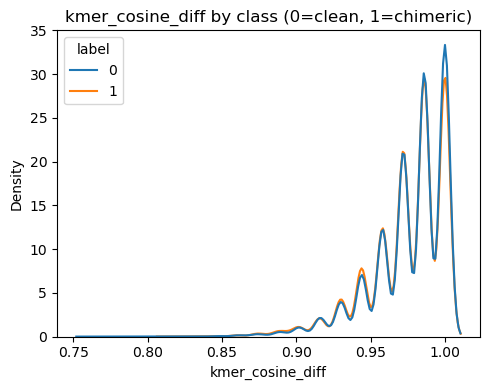

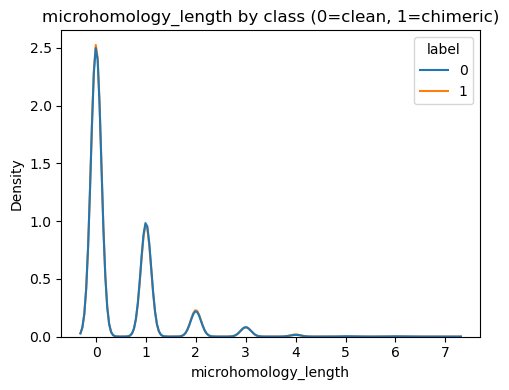

In [19]:
features_to_plot = [
    "sa_count",
    "softclip_left",
    "softclip_right",
    "kmer_js_divergence",
    "kmer_cosine_diff",
    "microhomology_length",
]

for feat in features_to_plot:
    plt.figure(figsize=(5, 4))
    sns.kdeplot(data=df, x=feat, hue="label", common_norm=False)
    plt.title(f"{feat} by class (0=clean, 1=chimeric)")
    plt.tight_layout()
    plt.show()

Correlation heatmap (numeric only)

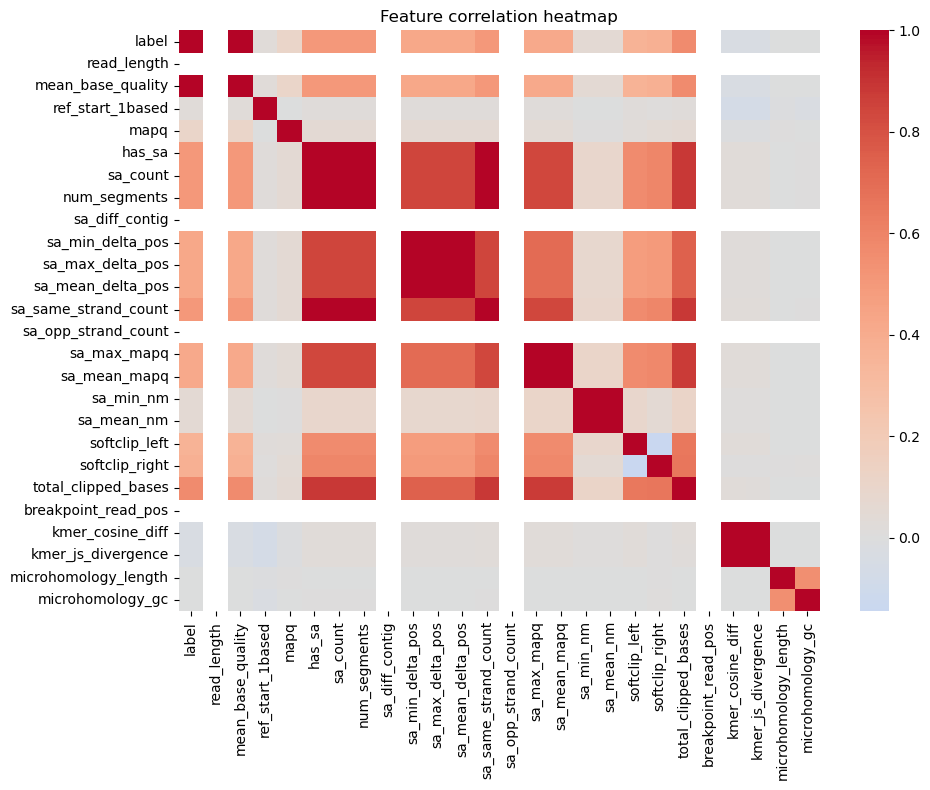

In [20]:
numeric_df = df.select_dtypes(include=["number"])
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature correlation heatmap")
plt.tight_layout()
plt.show()

In [22]:
import pandas as pd

df = pd.read_csv("../data/processed/all_reads.tsv", sep="\t")
print(df.shape)
df.head()

(39983, 30)


,read_id,label,read_length,mean_base_quality,ref_name,ref_start_1based,strand,mapq,cigar,has_sa,...,sa_min_nm,sa_mean_nm,softclip_left,softclip_right,total_clipped_bases,breakpoint_read_pos,kmer_cosine_diff,kmer_js_divergence,microhomology_length,microhomology_gc
0,NC_039553.1_5615_6078_7:0:0_2:0:0_c43,0,150,13.0,NC_039553.1,5929,-,60,150M,0,...,0,0.0,0,0,0,75,1.000000,1.000000,0,0.0
1,NC_039553.1_7137_7671_7:0:0_8:0:0_115d,0,150,13.0,NC_039553.1,7137,+,60,150M,0,...,0,0.0,0,0,0,75,0.957143,0.957143,1,1.0
2,chimera_1_A9831-10051_B14983-15061_MH0_249619_...,1,150,40.0,NC_039553.1,2034,-,60,141M9S,0,...,0,0.0,0,9,9,75,1.000000,1.000000,0,0.0
3,chimera_1_A9831-10051_B14983-15061_MH0_32000_3...,1,150,40.0,NC_039553.1,154,-,60,136M14S,0,...,0,0.0,0,14,14,75,0.957143,0.957143,1,0.0
4,NC_039553.1_14490_15018_4:0:0_7:0:0_1401,0,150,13.0,NC_039553.1,14490,+,60,150M,0,...,0,0.0,0,0,0,75,0.972222,0.971429,2,0.5


In [14]:
df.groupby("label").mean(numeric_only=True).T.sort_values(by=0, ascending=False).head(30)

label,0,1
ref_start_1based,8200.120953,8428.634600
read_length,150.000000,150.000000
breakpoint_read_pos,75.000000,75.000000
mapq,59.663464,59.987000
mean_base_quality,13.000000,40.000000
num_segments,1.000000,1.405850
kmer_cosine_diff,0.975813,0.974302
kmer_js_divergence,0.975804,0.974322
microhomology_length,0.461742,0.458400
total_clipped_bases,0.437472,25.441750
